## K-Means - Agrupamento de Dados

## Importando Bibliotecas

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

### Carregando a base de Dados Iris

In [6]:
iris = pd.read_csv('./datasets/iris.csv')

In [4]:
iris.head()

NameError: name 'iris' is not defined

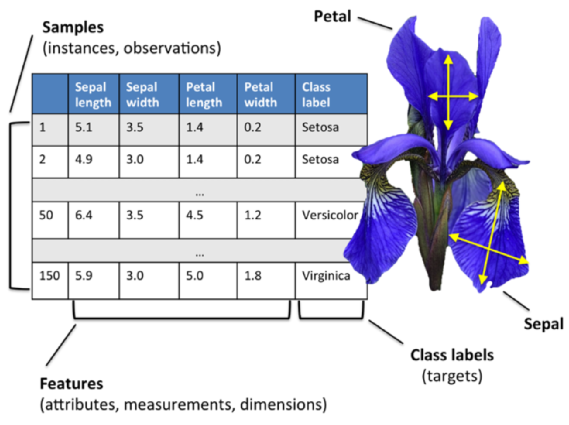

In [2]:
from IPython.display import Image
Image(filename='./materiasdeapoio/iris-data-set.png', width=500, height=500)

In [7]:
X = iris.drop('Species', axis=1)
X[:10]

,SepalLength,SepalWidth,PetalLength,PetalWidth
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


In [90]:
y =  iris.Species

In [91]:
y.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

### Convertendo valores categóricos de classes em números

In [92]:
def converte_classe(l):
    if l == 'Iris-setosa':
        return 0
    elif l == 'Iris-versicolor':
        return 1
    elif l == 'Iris-virginica':
        return 2

In [93]:
y = y.apply(converte_classe)

In [94]:
y.value_counts()

2    50
1    50
0    50
Name: Species, dtype: int64

## Instânciando o Algoritmo K-means com  clusters

In [95]:
kmeans = KMeans(n_clusters=3, init='k-means++')

In [96]:
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

### Centroids

In [97]:
kmeans.cluster_centers_

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.418     , 1.464     , 0.244     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

### Tabela de Distância

In [98]:
distance = kmeans.fit_transform(X)
distance

array([[0.14694217, 3.41925061, 5.0595416 ],
       [0.43816892, 3.39857426, 5.11494335],
       [0.41230086, 3.56935666, 5.27935534],
       [0.51883716, 3.42240962, 5.15358977],
       [0.19796969, 3.46726403, 5.10433388],
       [0.68380699, 3.14673162, 4.68148797],
       [0.41520116, 3.51650264, 5.21147652],
       [0.0599333 , 3.33654987, 5.00252706],
       [0.80099438, 3.57233779, 5.32798107],
       [0.36659514, 3.3583767 , 5.06790865],
       [0.48784424, 3.32449131, 4.89806763],
       [0.25138019, 3.31126872, 4.9966845 ],
       [0.49192682, 3.46661272, 5.19103612],
       [0.90906105, 3.90578362, 5.65173594],
       [1.02019214, 3.646649  , 5.10804455],
       [1.21309192, 3.49427881, 4.88564095],
       [0.66241377, 3.495248  , 5.03090587],
       [0.1509702 , 3.38444981, 5.02342022],
       [0.82848778, 3.11245944, 4.61792995],
       [0.39898872, 3.37738931, 4.97213426],
       [0.46172719, 3.07471224, 4.6955761 ],
       [0.33762701, 3.31506588, 4.9236821 ],
       [0.

In [99]:
distance[0]

array([0.14694217, 3.41925061, 5.0595416 ])

## Visualizando valores de Distância para cada Cluster

<IPython.core.display.Javascript object>


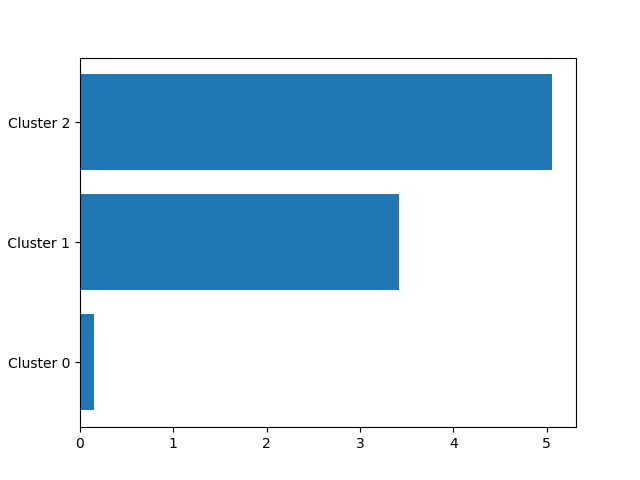

<BarContainer object of 3 artists>

In [100]:
%matplotlib notebook
x = ['Cluster 0',' Cluster 1','Cluster 2' ]
plt.barh(x, distance[0])

## Imprimindo Relatório

In [101]:
labels = kmeans.labels_

In [102]:
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1])

## Visualizando os Centroids

<IPython.core.display.Javascript object>


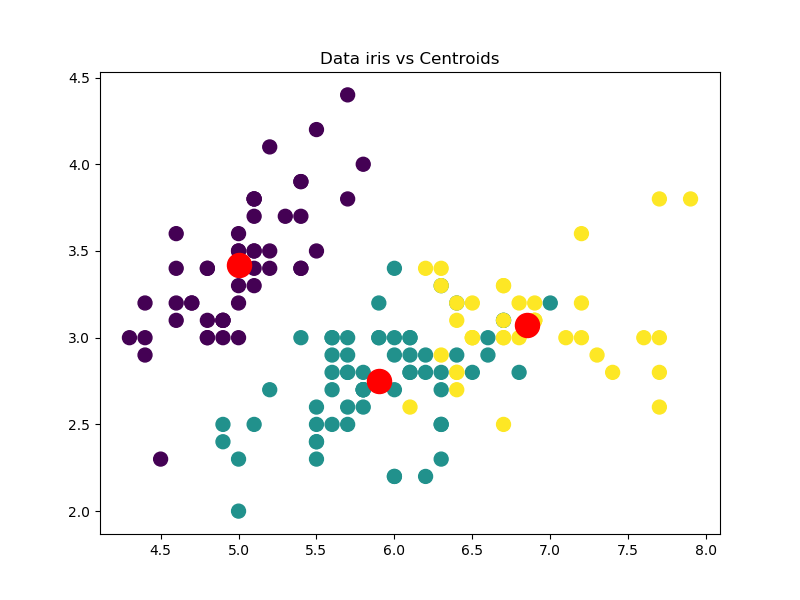

In [103]:
%matplotlib notebook
plt.figure(figsize=(8,6))
plt.scatter(X['SepalLength'], X['SepalWidth'], s=100, c=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=300, c='red', label='Centroids')
plt.title('Data iris vs Centroids')
plt.show()

## Agrupando novos dados 

In [104]:
data = [
        [4.12, 3.4, 1.6, 0.7],
        [5.2, 5.8, 5.2, 6.7],
        [3.1, 3.5, 3.3, 3.0],
    ]
kmeans.predict(data)

array([0, 2, 1])

## Visualizando os Resultados

<IPython.core.display.Javascript object>


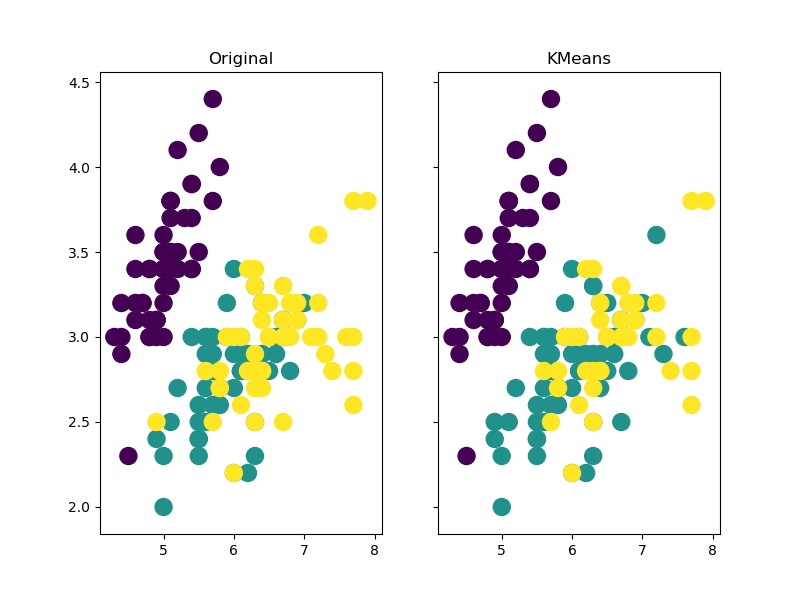

In [105]:
%matplotlib notebook
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(8,6))
ax1.set_title('Original')
ax1.scatter(X['SepalLength'], X['SepalWidth'], s=150, c=sorted(y))
ax2.set_title('KMeans')
ax2.scatter(X['SepalLength'], X['SepalWidth'], s=150, c=sorted(kmeans.labels_))

# Estimando o valor do parâmetro K - Métedo Elbow

1 680.8244
2 152.36870647733906
3 78.94084142614602
4 57.345409315718165
5 46.56163015873016
6 39.251830892636775
7 36.86967267267268
8 30.276436720142602
9 28.143108516612386
10 26.48125374676176


<IPython.core.display.Javascript object>


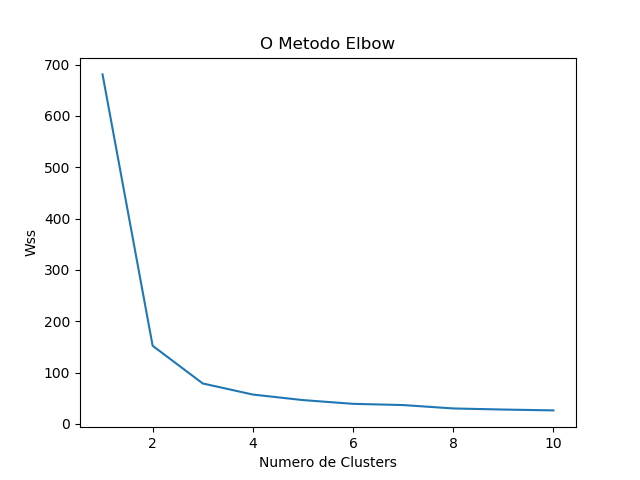

In [106]:
# Metodo do COTOVELO.

%matplotlib notebook
wcss = []

for i in range(1, 11):
    kmeans2 = KMeans(n_clusters=i, init='random')
    kmeans2.fit(X)
    print(i, kmeans2.inertia_) # Somatorio dos erros quadraticos dos erros dos cluters
    wcss.append(kmeans2.inertia_)
plt.plot(range(1,11), wcss)
plt.title('O Metodo Elbow')
plt.xlabel('Numero de Clusters')
plt.ylabel('Wss') # within cluster sum of squares
plt.show()
    


# Técnicas de Validação

## Matriz de Confusão

In [107]:
print (pd.crosstab(y, kmeans.labels_, rownames=['Real'], colnames=['Predito'], margins=True))

Predito   0   1   2  All
Real                    
0        50   0   0   50
1         0  48   2   50
2         0  14  36   50
All      50  62  38  150


In [108]:
from sklearn import metrics
clusters = ['Cluster 2', 'Cluster 1', 'Cluster 0']
print(metrics.classification_report(y, kmeans.labels_, target_names=clusters))

              precision    recall  f1-score   support

   Cluster 2       1.00      1.00      1.00        50
   Cluster 1       0.77      0.96      0.86        50
   Cluster 0       0.95      0.72      0.82        50

    accuracy                           0.89       150
   macro avg       0.91      0.89      0.89       150
weighted avg       0.91      0.89      0.89       150



https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html